# 1. Analysis of A24 Movies data from Rotten Tomatoes
- correlation between audience and critic ratings?
- any changes in runtime, scores, etc over the years? 
- best directors? best actors?

# 2. Simple models to predict scores 
- linear model

# Explore the data + Cleaning 

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
movies_df = pd.read_csv('full_scraped_a24_df.csv', index_col=0)

In [98]:
## basic exploration
print(f'Size of dataset: {movies_df.shape}')

movies_df.describe()

Size of dataset: (136, 23)


,Release Year
count,136.000000
mean,2017.955882
std,3.236064
min,2012.000000
25%,2015.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


Cleaning required -- there should be more numeric columns than this

In [99]:
print(movies_df.columns)
pd.set_option('display.max_columns', 500)
(movies_df.head())

Index(['Title', 'Release Year', 'RT_score', 'URL', 'Director', 'Cast',
       'Director.1', 'Producer', 'Screenwriter', 'Distributor',
       'Production Co', 'Rating', 'Genre', 'Original Language',
       'Release Date (Theaters)', 'Release Date (Streaming)',
       'Box Office (Gross USA)', 'Runtime', 'Sound Mix', 'Aspect Ratio',
       'audience_score', 'number_audience_reviews',
       'Rerelease Date (Theaters)'],
      dtype='object')


,Title,Release Year,RT_score,URL,Director,Cast,Director.1,Producer,Screenwriter,Distributor,Production Co,Rating,Genre,Original Language,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Sound Mix,Aspect Ratio,audience_score,number_audience_reviews,Rerelease Date (Theaters)
0,Lady Bird,2017,99%,https://www.rottentomatoes.com/m/lady_bird,Greta Gerwig,"Saoirse Ronan,Laurie Metcalf,Timothée Chalamet...",Greta Gerwig,"Scott Rudin,Eli Bush,Evelyn O'Neill",Greta Gerwig,A24,"Scott Rudin Productions,A24",R (Language|Brief Graphic Nudity|Sexual Conten...,"Comedy,Drama",English,"Nov 22, 2017, Wide","Feb 13, 2018",$48.9M,1h 34m,Dolby Digital,Flat (1.85:1),79%,"10,000+ Ratings",NaN
1,Eighth Grade,2018,99%,https://www.rottentomatoes.com/m/eighth_grade,Bo Burnham,"Elsie Fisher,Daniel Zolghadri,Fred Hechinger,I...",Bo Burnham,"Scott Rudin,Eli Bush,Lila Yacoub,Christopher S...",Bo Burnham,A24,A24,R (Some Sexual Material|Language),"Comedy,Drama",English,"Aug 3, 2018, Wide","Sep 25, 2018",$13.5M,1h 33m,NaN,Flat (1.85:1),82%,"5,000+ Ratings",NaN
2,Moonlight,2016,98%,https://www.rottentomatoes.com/m/moonlight_2016,Barry Jenkins,"Mahershala Ali,Alex R. Hibbert,Ashton Sanders,...",Barry Jenkins,"Adele Romanski,Dede Gardner,Jeremy Kleiner",Barry Jenkins,A24,"Plan B Entertainment,Upload Films,Pastel",R (Drug Use|Brief Violence|Language Throughout...,"Drama,LGBTQ+",English,"Nov 18, 2016, Wide","Feb 21, 2017",$27.9M,1h 51m,Dolby Digital,Scope (2.35:1),79%,"25,000+ Ratings",NaN
3,Minari,2020,98%,https://www.rottentomatoes.com/m/minari,Lee Isaac Chung,"Steven Yeun,Han Ye-ri,Youn Yuh-jung,Will Patton",Lee Isaac Chung,"Dede Gardner,Jeremy Kleiner,Christina Oh",Lee Isaac Chung,A24,Plan B Entertainment,PG-13 (Some Thematic Elements|A Rude Gesture),Drama,English,"Feb 12, 2021, Limited","Feb 26, 2021",$700.0K,1h 55m,NaN,NaN,87%,"1,000+ Ratings",NaN
4,Marcel the Shell with Shoes On,2021,98%,https://www.rottentomatoes.com/m/marcel_the_sh...,Dean Fleischer-Camp,"Jenny Slate,Rosa Salazar,Thomas Mann,Isabella ...",Dean Fleischer-Camp,"Dean Fleischer-Camp,Andrew Goldman,Elisabeth H...","Dean Fleischer-Camp,Jenny Slate,Nick Paley",A24,Cinereach,PG (Thematic Elements|Some Suggestive Material),"Kids & Family,Comedy,Animation",English,"Jul 22, 2022, Wide","Sep 6, 2022",$5.7M,1h 29m,NaN,NaN,90%,"1,000+ Ratings",NaN


# Genres 

In [100]:
## Explore genres
from collections import Counter 
movies_df['Genre'].value_counts()


all_genres = ','.join(movies_df['Genre']).split(',')
genre_counter = (Counter(all_genres))

print(f'Number of genres : {len(genre_counter)}')
genre_counter

## Sort out the counter to get arranged by frequency of genres
sorted(genre_counter.items(), key= lambda item: -item[1])

Number of genres : 22


[('Drama', 90),
 ('Mystery & Thriller', 46),
 ('Comedy', 45),
 ('Horror', 24),
 ('Romance', 15),
 ('Sci-Fi', 10),
 ('Crime', 9),
 ('Action', 7),
 ('Fantasy', 7),
 ('LGBTQ+', 5),
 ('Adventure', 5),
 ('Biography', 4),
 ('Music', 4),
 ('Western', 4),
 ('History', 4),
 ('War', 4),
 ('Documentary', 3),
 ('Holiday', 2),
 ('Kids & Family', 1),
 ('Animation', 1),
 ('Sports', 1),
 ('Musical', 1)]

In [101]:
genre_freq = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Frequency']).sort_values('Frequency', ascending=False)
genre_freq['Cumulative Sum'] = genre_freq['Frequency'].cumsum()
genre_freq['Cumulative Sum Percentage'] = ((genre_freq['Cumulative Sum']/genre_freq['Frequency'].sum()) * 100).round(2)
genre_freq.reset_index(drop = True)

,Genre,Frequency,Cumulative Sum,Cumulative Sum Percentage
0,Drama,90,90,30.82
1,Mystery & Thriller,46,136,46.58
2,Comedy,45,181,61.99
3,Horror,24,205,70.21
4,Romance,15,220,75.34
5,Sci-Fi,10,230,78.77
6,Crime,9,239,81.85
7,Action,7,246,84.25
8,Fantasy,7,253,86.64
9,LGBTQ+,5,258,88.36


We can see that the big 4 genres by A24 are 
* Drama : 30% of all genres
* Mystery and thriller : a personal favourite 
* Comedy : another personal favourite 
* Horror : what brought me to A24

These 4 genres made up 75% of all genres by A24.

## Genre correlation

In [102]:
print(f"Percentage of movies with more than 1 genre: {movies_df['Genre'].str.contains(',').sum()/len(movies_df)*100} %")

Percentage of movies with more than 1 genre: 75.0 %


As we can see most of the movies contain more than one genre. Let us see which are some popular combinations of genres

To do so we will need to split up the genres into a column for each possible genre, i.e. **one hot encoding**.

[]

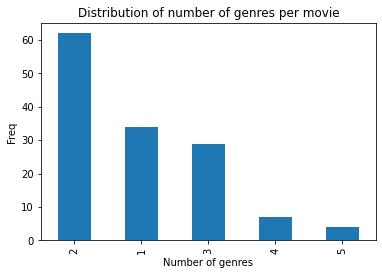

In [103]:
unique_genres = genre_freq['Genre'].tolist()

for genre in unique_genres:
    movies_df[genre] = movies_df['Genre'].apply(lambda x: 1 if genre in x else 0)

## Check results 
## See total number of genres per movie by summing up the 1s horizontally
movies_df[unique_genres].sum(axis=1).value_counts().plot(kind = 'bar', xlabel = 'Number of genres', 
                                                         ylabel = 'Freq', 
                                                         title = 'Distribution of number of genres per movie')
plt.plot()

### Visualise genre correlation

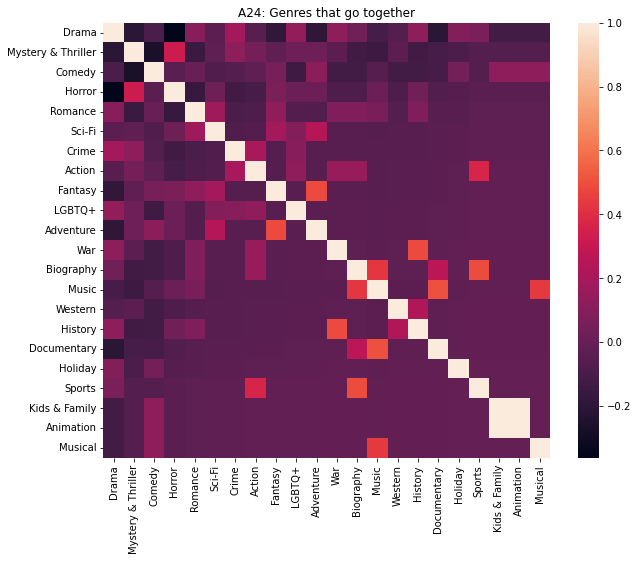

In [104]:
genre_corr = movies_df[unique_genres].corr()
plt.figure(figsize=(10,8))
sns.heatmap(genre_corr)
plt.title('A24: Genres that go together')
plt.show()

### Most popular pairs

In [141]:
## First, create a mask such that we only get the upper triangle for the 
all_corr_df = genre_corr.unstack().reset_index()
all_corr_df.columns = ['Genre1', 'Genre2', 'Corr']
## Remove self correlations (i.e. Corr = 1)
unique_corr_df = all_corr_df[all_corr_df.Genre1 != all_corr_df.Genre2]
print(f'Shape before: {all_corr_df.shape} and after {unique_corr_df.shape}')

Shape before: (484, 3) and after (462, 3)


In [150]:
## Sort genre 1 and 2 so that we can remove the same pair later (e.g. A and B is the same as B and A)
## pair is just a helper column for us to remove duplicates -- remove this col when done 
unique_corr_df['pair'] = unique_corr_df.apply(lambda row: tuple(sorted([row['Genre1'], row['Genre2']])), axis=1)
corr_pairs_df = unique_corr_df.drop_duplicates('pair')
corr_pairs_df.drop(columns = 'pair').sort_values('Corr').reset_index(drop = True)

/var/folders/4k/l4b4k90s7mb5fw_d4xc66bym0000gn/T/ipykernel_11399/682901453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_corr_df['pair'] = unique_corr_df.apply(lambda row: tuple(sorted([row['Genre1'], row['Genre2']])), axis=1)


,Genre1,Genre2,Corr
0,Drama,Horror,-0.362120
1,Mystery & Thriller,Comedy,-0.271528
2,Drama,Mystery & Thriller,-0.211594
3,Drama,Documentary,-0.210076
4,Drama,Adventure,-0.190682
...,...,...,...
226,War,History,0.484848
227,Fantasy,Adventure,0.485003
228,Biography,Sports,0.494413
229,Music,Documentary,0.502720


### Which genres score the highest?

In [188]:
cleaned_df = movies_df.copy()

## Clean scores 
cleaned_df['audience_score'] = cleaned_df['audience_score'].str.replace('%', '')
cleaned_df['RT_score'] = cleaned_df['RT_score'].str.replace('%', '')
## Drop extra director column 
cleaned_df = cleaned_df.drop(columns='Director.1')
movies_df['audience_score_%'] = pd.to_numeric(movies_df['audience_score'].str.replace('%', ''))
movies_df['RT_score_%'] = pd.to_numeric(movies_df['RT_score'].str.replace('%', ''))


In [196]:
rt_genre_scores = []
aud_genre_scores = []
for genre in unique_genres:
    rt_genre_scores.append(round(cleaned_df[movies_df[genre] == 1]["RT_score_%"].mean(),2))
    aud_genre_scores.append(round(cleaned_df[movies_df[genre] == 1]["audience_score_%"].mean(),2))
genre_scores_df = pd.DataFrame({'Genre' : unique_genres, 'avg RT score': rt_genre_scores
              , 'avg Audience score' : aud_genre_scores
              }).sort_values('avg RT score', ascending = False)
genre_scores_df

,Genre,avg RT score,avg Audience score
20,Animation,98.00,90.00
19,Kids & Family,98.00,90.00
17,Holiday,93.50,61.00
16,Documentary,91.67,86.67
18,Sports,89.00,94.00
9,LGBTQ+,88.60,74.40
12,Biography,86.25,81.75
8,Fantasy,85.29,63.00
14,Western,81.75,64.00
10,Adventure,80.80,64.20


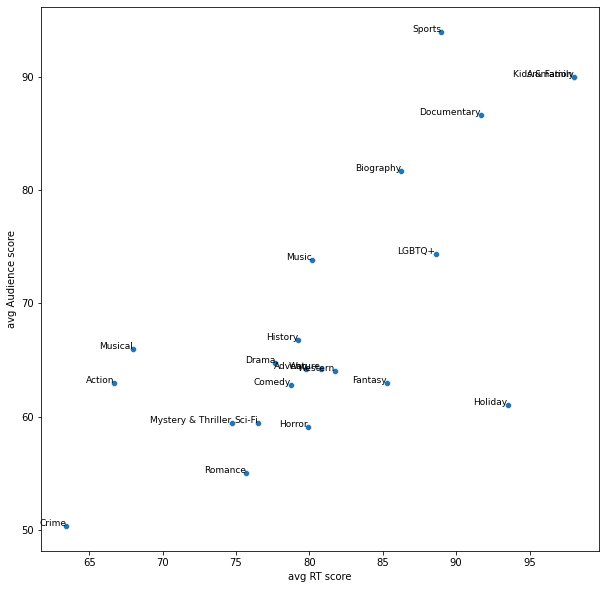

In [203]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = genre_scores_df, x = 'avg RT score', y = 'avg Audience score')
## annotate with genre
for i, row in genre_scores_df.iterrows():
    plt.text(row['avg RT score'], row['avg Audience score'], row['Genre'], fontsize=9, ha='right')


Genres that do well on both accounts include: Sports, Kids & Family, Documentary 

Genres that fare badly : Crime

There is generally a correlation between critics and audiences on the scores they give to genres (on average, for each genre). However one that they disagree on is the genre **Holiday**, which achieves high critics but low audience scores.

Some examples are below:

In [208]:
movies_df[movies_df['Holiday'] == 1][['Title', 'Release Year', 'RT_score', 'audience_score']]


,Title,Release Year,RT_score,audience_score
16,Krisha,2015,95%,77%
29,The Humans,2021,92%,45%


# 1. Actors/ cast

In [225]:
all_actors_combined_list = ','.join(movies_df['Cast'])
all_actors_combined_list
actors_counter = Counter(all_actors_combined_list.split(','))
actors_counter.most_common(5)

[('Tilda Swinton', 4),
 ('Robert Pattinson', 4),
 ('Riley Keough', 4),
 ('Elle Fanning', 4),
 ('Lucas Hedges', 3)]

In [226]:
print(f'Total number of unique actors: {len(actors_counter)}')

Total number of unique actors: 466


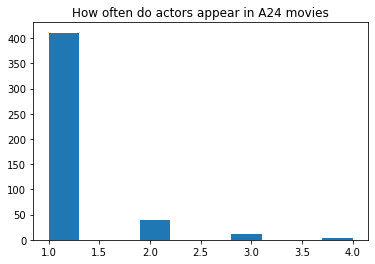

In [234]:
plt.hist(actors_counter.values())
plt.title('How often do actors appear in A24 movies')
plt.show()

It is very right skewed - only a handful of actors have appeared more than once in the movies

In [262]:
recurrent_actors = [(actors, count) for actors,count in actors_counter.items() if count >2]
sorted(recurrent_actors, key = lambda item: -item[1])
       

[('Tilda Swinton', 4),
 ('Robert Pattinson', 4),
 ('Riley Keough', 4),
 ('Elle Fanning', 4),
 ('Lucas Hedges', 3),
 ('Daniel Zolghadri', 3),
 ('Isabella Rossellini', 3),
 ('John Magaro', 3),
 ('Mia Goth', 3),
 ('Brie Larson', 3),
 ('Oscar Isaac', 3),
 ('Alicia Vikander', 3),
 ('Joe Cole', 3),
 ('James Franco', 3),
 ('Colin Farrell', 3)]

# Critics vs Audience 

Let us clean the number of audience reviews such that we glean some insights from it - as a proxy of popularity

In [368]:
movies_df['number_audience_reviews_censored'] = movies_df['number_audience_reviews'].str.replace(',', '').str.split('+').str[0]
movies_df['number_audience_reviews_censored'][movies_df['number_audience_reviews_censored'].str.contains('Fewer')]

## Replace text 'Fewer than 50' with just 50
movies_df.loc[movies_df['number_audience_reviews_censored'].str.contains('Fewer'), 'number_audience_reviews_censored'] = 50

## Now convert everything to numeric 
movies_df['number_audience_reviews_censored'] = pd.to_numeric(movies_df['number_audience_reviews_censored'])

[]

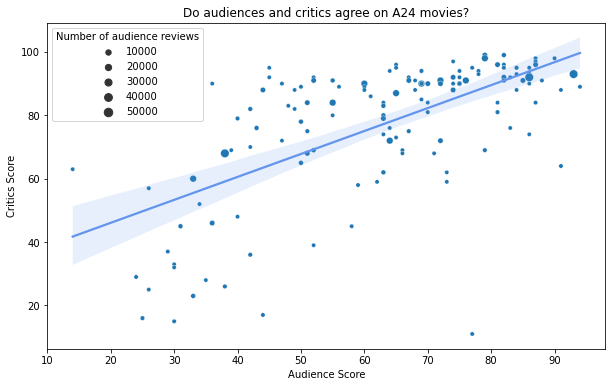

In [378]:
plt.figure(figsize=(10,6))

sns.scatterplot(data = movies_df, x = 'audience_score_%', 
                y = 'RT_score_%', size = 'number_audience_reviews_censored')
sns.regplot(data = movies_df, x = 'audience_score_%', 
                y = 'RT_score_%', scatter = False, color = 'cornflowerblue')
plt.title('Do audiences and critics agree on A24 movies?')
plt.xlabel('Audience Score')
plt.ylabel('Critics Score')
plt.legend(title = 'Number of audience reviews')
plt.plot()

There is high variance amongst critics for low audience scoring movies. However, as the audience scores increase, the critics tend to agree more that the movies are better, showing a decreasing variance. 

There is only one anomaly - a high (~78) rated movie by audiences, but below 10 by critics. 

As for audience popularity, we do see that the more commonly reviewed movies are the ones in the top right hand corner, where both audience and critics view more favourably. 

In [210]:
anomaly = (movies_df['RT_score_%'] <20) & (movies_df['audience_score_%'] > 70)
movies_df[anomaly]

,Title,Release Year,RT_score,URL,Director,Cast,Director.1,Producer,Screenwriter,Distributor,Production Co,Rating,Genre,Original Language,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Sound Mix,Aspect Ratio,audience_score,number_audience_reviews,Rerelease Date (Theaters),Drama,Mystery & Thriller,Comedy,Horror,Romance,Sci-Fi,Crime,Action,Fantasy,LGBTQ+,Adventure,War,Biography,Music,Western,History,Documentary,Holiday,Sports,Kids & Family,Animation,Musical,audience_score_%,RT_score_%
135,The Vanishing of Sidney Hall,2017,11%,https://www.rottentomatoes.com/m/the_vanishing...,Shawn Christensen,"Kyle Chandler,Logan Lerman,Elle Fanning,Blake ...",Shawn Christensen,Jonathan Schwartz,"Shawn Christensen,Jason Dolan",A24,Super Crispy Entertainment,R (Some Sexual References|Language),"Mystery & Thriller,Drama",English,"Mar 2, 2018, Limited","Mar 2, 2018",NaN,1h 59m,NaN,NaN,77%,500+ Ratings,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,11


# Run times : are they getting longer? Are they popular with fans and critics?

In [289]:
hours = pd.to_numeric(movies_df['Runtime'].str[0])
mins = pd.to_numeric(movies_df['Runtime'].str[3:-1])
movies_df['Runtime_hours'] = hours + (mins/60)
movies_df['Runtime_mins'] = hours*60 + mins
movies_df['Runtime_mins'].head()

0     94
1     93
2    111
3    115
4     89
Name: Runtime_mins, dtype: int64

## Longest and shortest running movies

In [297]:
longest = movies_df.sort_values('Runtime_mins').head(3)
shortest = movies_df.sort_values('Runtime_mins').tail(3)

pd.concat([longest, shortest], axis=0)[['Title', 'Director','Runtime_mins', 'Release Year', 'RT_score', 'audience_score']]

,Title,Director,Runtime_mins,Release Year,RT_score,audience_score
14,Menashe,Joshua Z Weinstein,82,2017,95%,65%
51,Obvious Child,Gillian Robespierre,83,2014,90%,72%
117,Slice,Austin Vesely,83,2018,52%,34%
75,Midsommar,Ari Aster,145,2019,83%,63%
82,American Honey,Andrea Arnold,162,2016,80%,63%
105,Beau Is Afraid,Ari Aster,179,2023,68%,71%


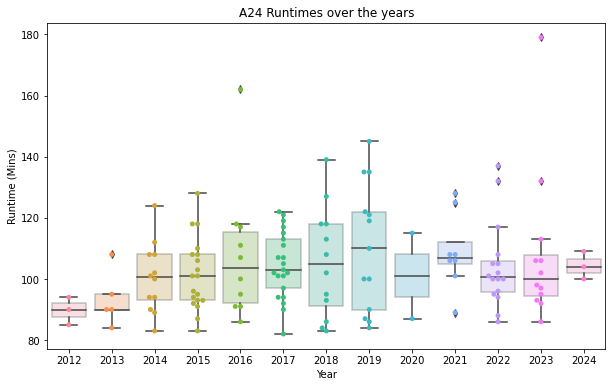

In [325]:
plt.figure(figsize=(10,6))
sns.regplot(x='Release Year', y='Runtime_mins', data=movies_df, scatter=False, color='red', lowess=True)
sns.swarmplot(x = movies_df['Release Year'],y = movies_df['Runtime_mins'])
sns.boxplot(x = movies_df['Release Year'],y = movies_df['Runtime_mins'], boxprops=dict(alpha=.3))
# sns.regplot(x = movies_df['Release Year'],y = movies_df['Runtime_mins'])
plt.title('A24 Runtimes over the years')
plt.xlabel('Year')
plt.ylabel('Runtime (Mins)')
plt.show()

## Can we see a general trend?

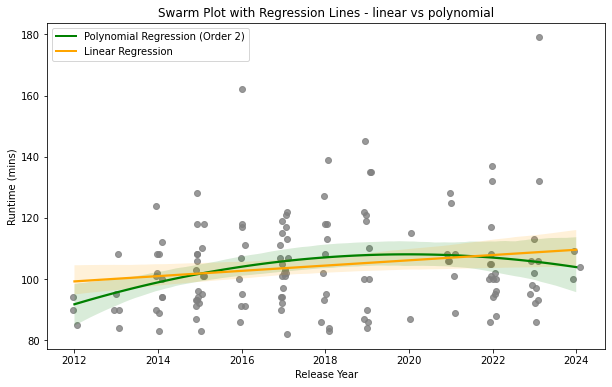

In [343]:
from matplotlib.lines import Line2D
plt.figure(figsize=(10, 6))

# sns.scatterplot(x='Release Year', y='Runtime_mins', data=movies_df,y_jitter=5)

# Overlay the regression line
sns.regplot(x='Release Year', y='Runtime_mins', data=movies_df, scatter=True, order = 2, x_jitter=0.1, 
            scatter_kws={"color": "grey"}, line_kws={"color": "green"})
sns.regplot(x='Release Year', y='Runtime_mins', data=movies_df, scatter=False, color='orange', lowess=False)

plt.xlabel('Release Year')
plt.ylabel('Runtime (mins)')
legend_elements = [Line2D([0], [0], color='green', lw=2, label='Polynomial Regression (Order 2)'),
                   Line2D([0], [0], color='orange', lw=2, label='Linear Regression')]

# Add the legend to the plot
plt.legend(handles=legend_elements)
plt.title('Swarm Plot with Regression Lines - linear vs polynomial')
plt.show()

The most general trend is that the run times are increasing, but when we increase the order of the fitted curve (i.e. quadratic line), we see that there is a dip after year 2020. As expected from higher order polynomial fits, the standard errors are wider at the ends too.

Text(0.5, 0, 'Runtime (mins)')

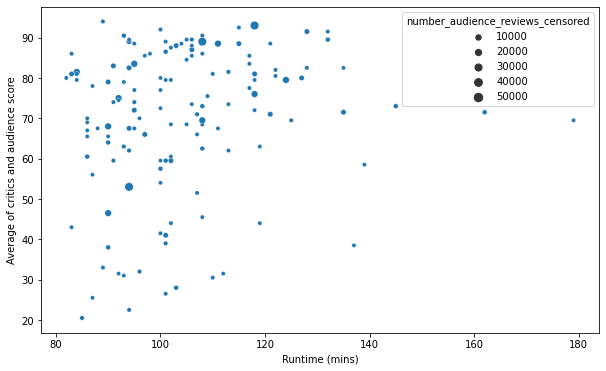

In [398]:
plt.figure(figsize=(10,6))
movies_df['critics_audience_avg_score_%'] = (movies_df['audience_score_%'] + movies_df['RT_score_%'])/2
sns.scatterplot(x = movies_df['Runtime_mins'], y = movies_df['critics_audience_avg_score_%'],
                size = movies_df['number_audience_reviews_censored'])
plt.ylabel('Average of critics and audience score')
plt.xlabel('Runtime (mins)')


There is no clear evidence to show that longer runtimes are associated with increased scores or higher popularity. 

# Box office: over the years

Clean Box Office column by standardising all to in terms of millions USD

In [416]:
def convert_to_millions(value):
    if isinstance(value, str):
        value = value.replace('$', '')
        if 'M' in value:
            return float(value.replace('M', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) / 1000
    return value  

movies_df['box_office_millions'] = movies_df['Box Office (Gross USA)'].apply(convert_to_millions)

## check 
movies_df['box_office_millions'].describe()


count    107.000000
mean       8.005124
std       14.029848
min        0.005600
25%        0.205550
50%        2.000000
75%        8.150000
max       76.700000
Name: box_office_millions, dtype: float64

Clean date as well

In [433]:
movies_df['Release Date'] = movies_df['Release Date (Theaters)'].apply(lambda date: ''.join(date.split(',')[:2]) if isinstance(date, str) else date)
movies_df['Release Date'] = pd.to_datetime(movies_df['Release Date'], format = '%b %d %Y')
movies_df['Release Date']

0     2017-11-22
1     2018-08-03
2     2016-11-18
3     2021-02-12
4     2022-07-22
         ...    
131   2015-08-07
132   2016-08-26
133   2013-02-08
134   2014-10-24
135   2018-03-02
Name: Release Date, Length: 136, dtype: datetime64[ns]

## Visualising blockbusters

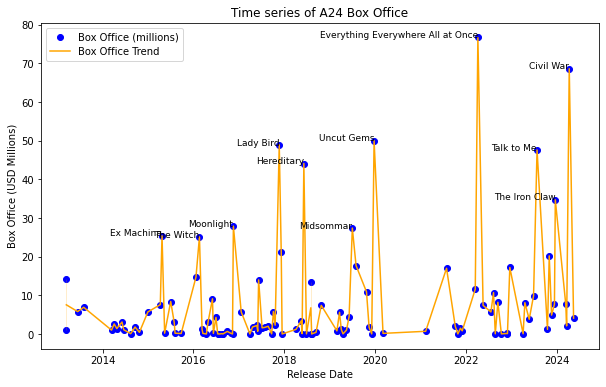

In [446]:
plt.figure(figsize = (10,6))
timeseries = movies_df.set_index('Release Date')
plt.scatter(movies_df['Release Date'], movies_df['box_office_millions'], color='blue', label='Box Office (millions)')
for i, row in movies_df.iterrows():
    if row['box_office_millions'] > 25:
        plt.text(row['Release Date'], row['box_office_millions'], row['Title'], fontsize=9, ha='right')

sns.lineplot(data=movies_df, x='Release Date', y='box_office_millions', color='orange', label='Box Office Trend')
plt.title('Time series of A24 Box Office')
plt.ylabel('Box Office (USD Millions)')
plt.show()

If we use a more modest definition of a blockbuster for A24 movies being more than 25 million, we see that we get one or more a year, with the exception of the Covid-19 period between 2020 and 2022. 

We can further the analysis to see 'time to blockbuster'

Average number of days between blockbusters: 327.6


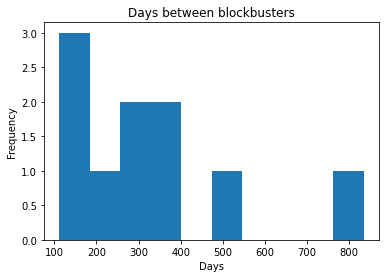

In [493]:
movies_df['blockbuster'] = movies_df['box_office_millions'].apply(lambda x: True if x>25 else False)
blockbusters = movies_df[movies_df['blockbuster']].sort_values('Release Date')
time_to_blockbuster =blockbusters['Release Date'] - blockbusters['Release Date'].shift(1)
time_to_blockbuster = time_to_blockbuster.dt.days.dropna()
time_to_blockbuster.plot(kind = 'hist')
plt.title('Days between blockbusters')
plt.xlabel('Days')
print(f"Average number of days between blockbusters: {time_to_blockbuster.mean()}")

We see that the average wait is about less than a year, a value that is upwardly biased due to the Covid pause.

### Missing data analysis

In [213]:
## Percentage missing 
movies_df.isna().sum(axis = 0).sort_values(ascending=
                                           False)/movies_df.shape[0]

Rerelease Date (Theaters)    0.955882
Sound Mix                    0.705882
Aspect Ratio                 0.602941
Box Office (Gross USA)       0.213235
Release Date (Streaming)     0.044118
Production Co                0.044118
Release Date (Theaters)      0.029412
Distributor                  0.029412
Screenwriter                 0.022059
Producer                     0.014706
Rating                       0.014706
Biography                    0.000000
War                          0.000000
Adventure                    0.000000
Music                        0.000000
Western                      0.000000
LGBTQ+                       0.000000
Fantasy                      0.000000
Title                        0.000000
History                      0.000000
Crime                        0.000000
Documentary                  0.000000
Holiday                      0.000000
Sports                       0.000000
Kids & Family                0.000000
Animation                    0.000000
Musical     

#### Visualise the missing data 

In [214]:
import missingno as msno

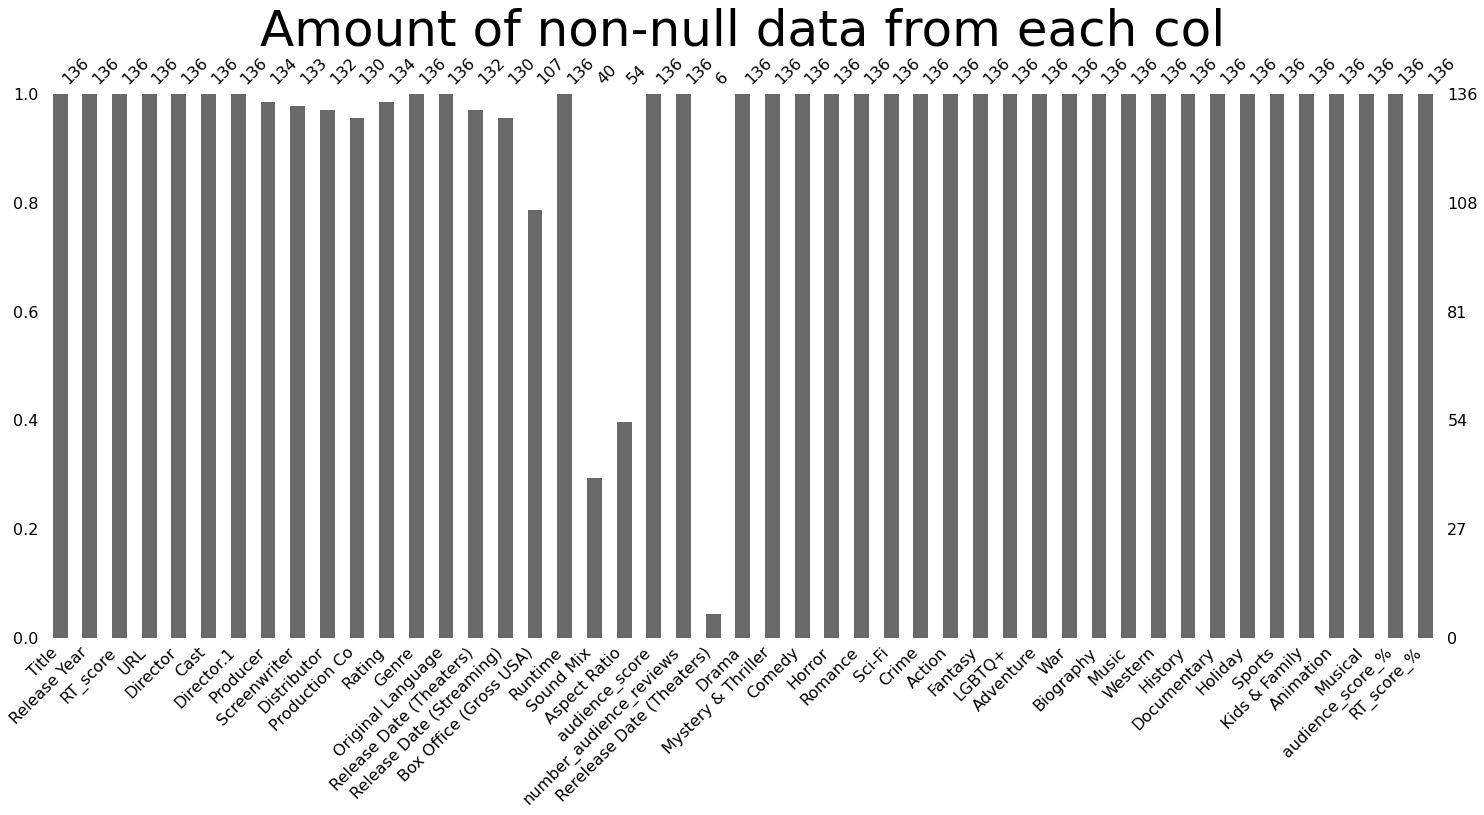

In [215]:
## visualising nullity bu column
msno.bar(movies_df)
plt.title('Amount of non-null data from each col', size = 50)
plt.show()

##### Do the missing data come from the same places - are they correlated?

This could reveal insights into the way we collected the data, i.e. via simple html webscrapping. It is possible that the pages where most data weren't captured had different html structure for the data that we were trying to get, hence causing correlated nullity. 

<AxesSubplot:>

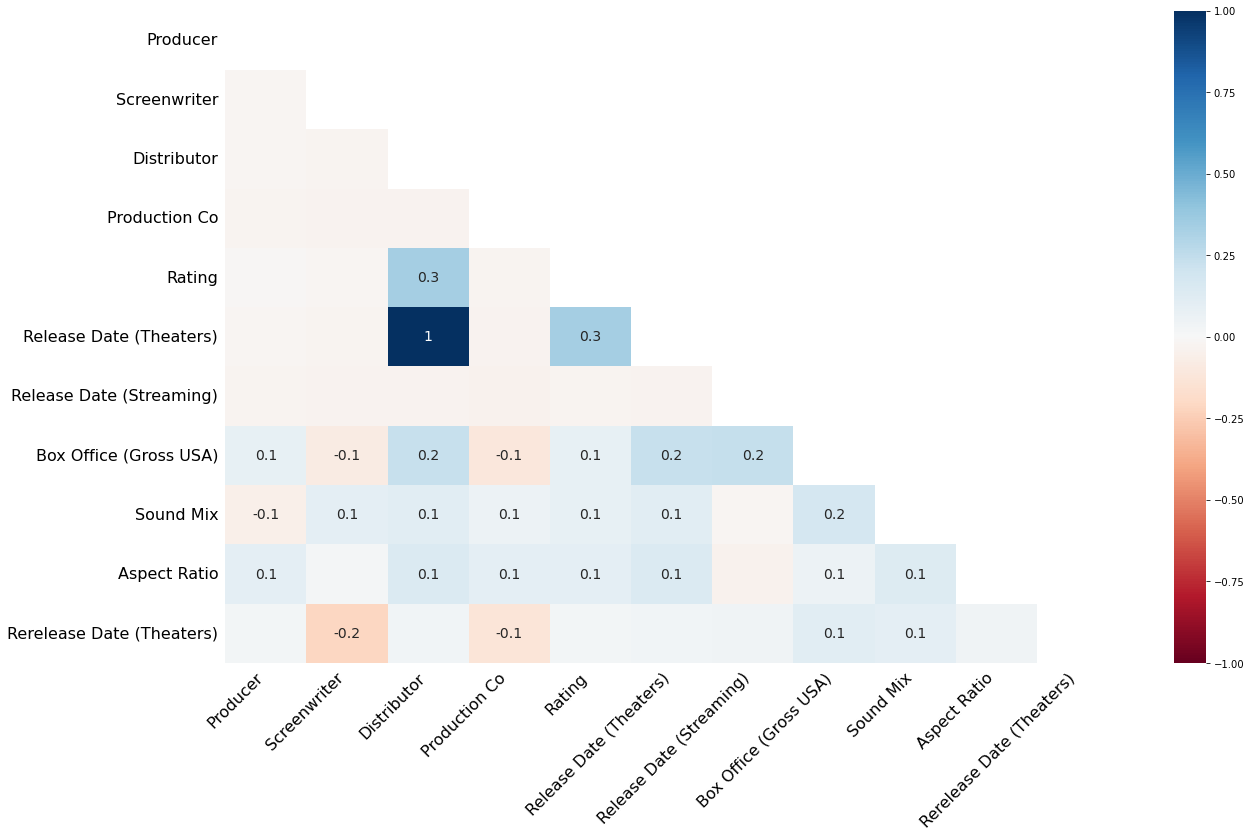

In [216]:
msno.heatmap(movies_df)

The missingness in the missing cols are quite highly correlated. For example, Genre and Duration are perfectly correlated, suggesting that they go missing together. 